US Cities Dataset

Biman Mondal

June 2, 2025

In [4]:
# Import numpy package
import numpy as np
# Import pandas package
import pandas as pd
# Import matplotlib package
import matplotlib.pyplot as plt
# Import the seaborn package
import seaborn as sns

#### Import the dataset

In [20]:
# The dataset was found on Kaggle but its orgin is : https://simplemaps.com/data/us-cities
# Import US Cities Dataset
cities = pd.read_csv('./uscities.csv',header='infer',index_col='id')

In [5]:
cities.head().T

id,1840034016,1840020491,1840000494,1840015149,1840019440
city,New York,Los Angeles,Chicago,Miami,Dallas
city_ascii,New York,Los Angeles,Chicago,Miami,Dallas
state_id,NY,CA,IL,FL,TX
state_name,New York,California,Illinois,Florida,Texas
county_fips,36061,6037,17031,12086,48113
county_name,New York,Los Angeles,Cook,Miami-Dade,Dallas
lat,40.6943,34.1139,41.8373,25.7839,32.7936
lng,-73.9249,-118.4068,-87.6862,-80.2102,-96.7662
population,18713220,12750807,8604203,6445545,5743938
density,10715,3276,4574,5019,1526


In [34]:
cities.timezone = cities["timezone"].str.split('/',expand=True)[1].values

#### About the dataset

Some of the features are self explanatory while other require a description below

<p>city 	         The name of the city/town. </p>	
<p>city_ascii 	     city as an ASCII string. </p>			
<p>city_alt 	     Alternative name of the city/town. (e.g. Saint Louis) 	</p>			
<p>lat 	         The latitude of the city/town.</p>	 			
<p>lng 	         The longitude of the city/town. </p>				
<p>state_id 	     The state or territory's USPS postal abbreviation.</p>	 			
<p>state_name 	     The name of the state or territory that contains the city/town.</p>	 		
<p>county_fips      The 5-digit FIPS code for the primary county.</p>	
<p>county_name      The name of the primary county (or equivalent) that contains the city/town. </p>
<p>population 	     An estimate of the city's urban population.</p>	 
<p>density 	     The estimated population per square kilometer. </p>				
<p>incorporated 	 TRUE if the place is a city/town. </p>	
<p>source 	         For some cities, our data is generated from a polygon, </p>	
<p>military 	     TRUE if this place is a military establishment such as a fort or base.</p>	
<p>ranking 	     An integer from 1-5 that captures the importance of a city (1 is most important, 5 <p>least important). </p>			
<p>zips 	         A string containing all five-digit zip codes in the city/town, delimited by a space.
</p>	

In [234]:
cities.info()

print(cities.shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, 1840034016 to 1840021518
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          464 non-null    object 
 1   city_ascii    464 non-null    object 
 2   state_id      464 non-null    object 
 3   state_name    464 non-null    object 
 4   county_fips   464 non-null    int64  
 5   county_name   464 non-null    object 
 6   lat           464 non-null    float64
 7   lng           464 non-null    float64
 8   population    464 non-null    int64  
 9   density       464 non-null    int64  
 10  source        464 non-null    object 
 11  military      464 non-null    bool   
 12  incorporated  464 non-null    bool   
 13  timezone      464 non-null    object 
 14  ranking       464 non-null    int64  
 15  zips          464 non-null    object 
dtypes: bool(2), float64(2), int64(4), object(8)
memory usage: 55.3+ KB
464


In [6]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
cities.population.describe()

count      28338
mean       14261
std       189811
min            1
25%          330
50%         1089
75%         4486
max     18713220
Name: population, dtype: float64

## Population of Cities and Total US Population

In [7]:
print(f"The total population of the cities in the dataframe: {cities.population.sum():,}.")
print("The total population provided by the US census is: 341,878,400.")
# Some duplicate counting is going on within the dataframe

The total population of the cities in the dataframe: 404,119,949.
The total population provided by the US census is: 341,878,400.


In [8]:
cities[cities.military][:5]

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips
id,,,,,,,,,,,,,,,,
1840005661,Edgewood,Edgewood,MD,Maryland,24025,Harford,39,-76,25574,555,polygon,True,True,America/New_York,3,21009 21010 21040
1840073932,Fort Hood,Fort Hood,TX,Texas,48027,Bell,31,-98,23508,579,polygon,True,True,America/Chicago,3,76544
1840075052,Schofield Barracks,Schofield Barracks,HI,Hawaii,15003,Honolulu,21,-158,19499,2716,polygon,True,True,Pacific/Honolulu,2,96857 96786
1840073756,Fort Leonard Wood,Fort Leonard Wood,MO,Missouri,29169,Pulaski,38,-92,16026,268,polygon,True,True,America/Chicago,3,65473
1840028557,Fort Carson,Fort Carson,CO,Colorado,8041,El Paso,39,-105,14951,672,polygon,True,True,America/Denver,3,80902 80913


There are 3 rankings: [1 2 3].


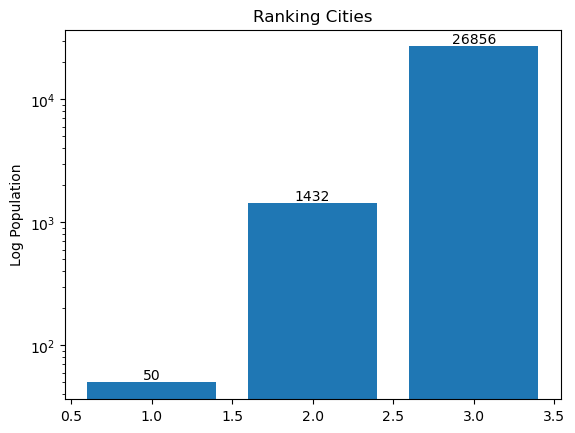

                    city state_id
id                               
1840034016      New York       NY
1840020491   Los Angeles       CA
1840000494       Chicago       IL
1840015149         Miami       FL
1840019440        Dallas       TX
1840000673  Philadelphia       PA
1840020925       Houston       TX
1840013660       Atlanta       GA
1840006060    Washington       DC
1840000455        Boston       MA


In [21]:
ranked_cities = cities.ranking.sort_values()
# Major and important cities are ranked as tier 1
print(f"There are {cities['ranking'].nunique()} rankings: {cities['ranking'].unique()}.")
my_array = [sum(ranked_cities==1),sum(ranked_cities==2),sum(ranked_cities==3)]
fig, ax = plt.subplots()
bar = ax.bar([1, 2, 3],my_array)
plt.yscale('log')
ax.bar_label(bar,my_array)
plt.title('Ranking Cities')
plt.ylabel('Log Population')
plt.show()
#
print(cities.loc[cities.ranking==1,['city','state_id']][:10])

### Number of cities in dataframe

In [22]:
# Count the number of cities
print(f"There are {cities.shape[0]} cities/towns accounted for.")
# Some cities are duplicated
print(f"Duplicate city names: {len(cities[cities['city'].duplicated()].sort_values(by=['city','population'],ascending=False))}")
# Subset the cities with populations above 100k
cities = cities[cities.population>100000]
print(f"Number of rows after population > 100k: {cities.shape[0]}")

There are 28338 cities/towns accounted for.
Duplicate city names: 9248
Number of rows after population > 100k: 464


Limit the number of cities with population above 100,000. 

### US Major City Population

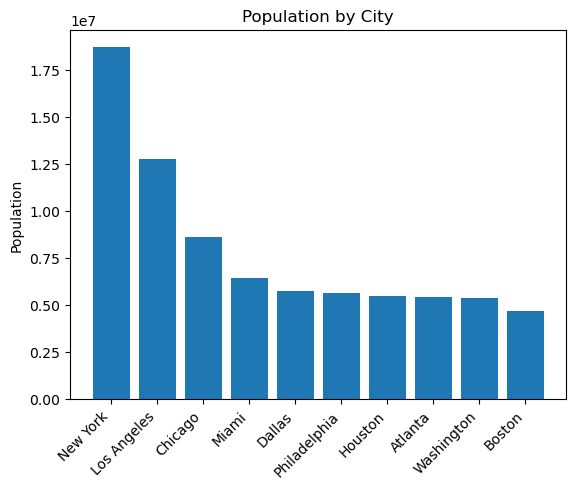

In [12]:
# US Major cities
largest_pops = cities['population'].sort_values(ascending=False)
largest_city_names = cities.loc[largest_pops.index,'city']
#print(largest_pops.nlargest(10))
ax = plt.bar(x=largest_city_names[:10],height=largest_pops.nlargest(10))
plt.xticks(rotation=45, ha='right')
plt.ylabel('Population')
plt.title('Population by City')
plt.show()


Note that this does not correspond to the official data. It depends on how the population and city area is counted.
https://en.wikipedia.org/wiki/Metropolitan_statistical_area

In [15]:
# Label small, medium, large cities
# 1-50,000 , 50,000 - 100,000, 100,000 - 500,000
small_cities = (cities.population>100000) & (cities.population<250000)
medium_cities = (cities.population>250000) & (cities.population<500000)
large_cities = (cities.population>500000) & (cities.population<1000000)
mega_cities = (cities.population>1000000)
#

print(f"There are {cities.loc[mega_cities,'city'].value_counts().sum()} mega sized cities.")
print(f"There are {cities.loc[large_cities,'city'].value_counts().sum()} large size cities.")
print(f"There are {cities.loc[medium_cities,'city'].value_counts().sum()} medium sized cities.")
print(f"There are {cities.loc[small_cities,'city'].value_counts().sum()} small sized cities.")
#
#cities.loc[mega_cities,['city','state_name','population']]
#cities.loc[large_cities,['city','state_name','population']]
cities.loc[medium_cities,['city','state_name','population']][:5]
cities.loc[small_cities,['city','state_name','population']][:5]


There are 50 mega sized cities.
There are 36 large size cities.
There are 99 medium sized cities.
There are 279 small sized cities.


,city,state_name,population
id,,,
1840003874,Chesapeake,Virginia,244835
1840031233,Barnstable,Massachusetts,242847
1840003869,Norfolk,Virginia,242742
1840020292,Fremont,California,241110
1840018481,Kennewick,Washington,240735


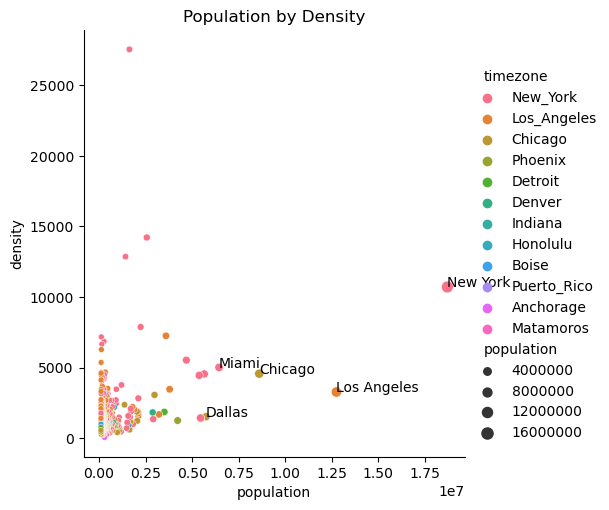

In [35]:
# Population Density
g=sns.relplot(data=cities,x='population',y='density',kind='scatter',hue='timezone',size='population',legend=True)
plt.title('Population by Density')

#print(dir(g._legend))
#plt.legend(bbox_to_anchor=(1.25, 0.5), ncol=2)

for k in range(5):
    plt.text(cities.population.iloc[k], cities.density.iloc[k], cities.city.iloc[k])
plt.show()
# The plot below shows that the a large number of major cities are on the east coast (NYC timezone)

The plot above shows that most of the large cities are located on the east coast.

In [36]:
print("Highest density cities:")
cities.loc[cities.density.sort_values().nlargest(5).index,["city","state_id","population","density"]]

Highest density cities:


,city,state_id,population,density
id,,,,
1840034000,Manhattan,NY,1628706,27545
1840034030,Brooklyn,NY,2559903,14221
1840033999,Bronx,NY,1418207,12862
1840034016,New York,NY,18713220,10715
1840034002,Queens,NY,2230722,7885


## Count the zip codes

In [180]:
cities['zip_count'] = cities.zips.apply(lambda x: len(x.split()))

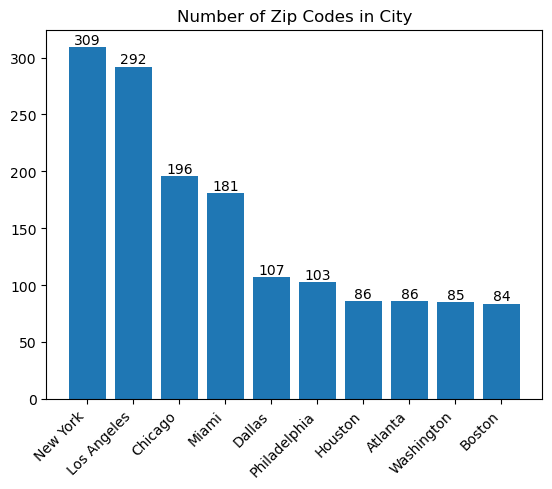

In [201]:
sorted_zip_count = cities.zip_count.sort_values(ascending=False)
#print(sorted_zip_count[:10].values)

fig, ax = plt.subplots()
cities['city'][:10]
bar = plt.bar(cities['city'][:10].values,sorted_zip_count[:10].values)
ax.bar_label(bar,sorted_zip_count[:10].values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Zip Codes in City')
plt.show()

# Counting the zip codes shows number of zip codes of a city correlate with its population

## Summary

<p>This notebook presentation has been an overview of the US cities dataset.
A few discrepancies have been uncovered with the data. We've determined the largest cities by population and explored city densities as well.<\p>